In [1]:
#https://github.com/ShauryaBhandari/Bigmart-Sales-Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # Ignores any warning
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
print(train)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
5              FDP36       10.395          Regular         0.000000   
6              FDO10       13.650          Regular         0.012741   
7              FDP10          NaN          Low Fat         0.127470   
8              FDH17       16.200          Regular         0.016687   
9              FDU28       19.200          Regular         0.094450   
10             FDY07       11.800          Low Fat         0.000000   
11             FDA03       18.500          Regular         0.045464   
12             FDX32       15.100          Regular         0.100014   
13    

In [4]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [12]:
# Check for duplicates
#print("item identifier\n"+str(len(train.Item_Identifier)))
#print("set item identifier\n"+str(len(set(train.Item_Identifier))))
idsUnique = len(set(train.Item_Identifier))
print("ids:"+str(idsUnique))
#train.shape[0]
idsTotal = train.shape[0]
print("ids:"+str(idsTotal))
idsDupli = idsTotal - idsUnique

print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

ids:1559
ids:8523
There are 6964 duplicate IDs for 8523 total entries


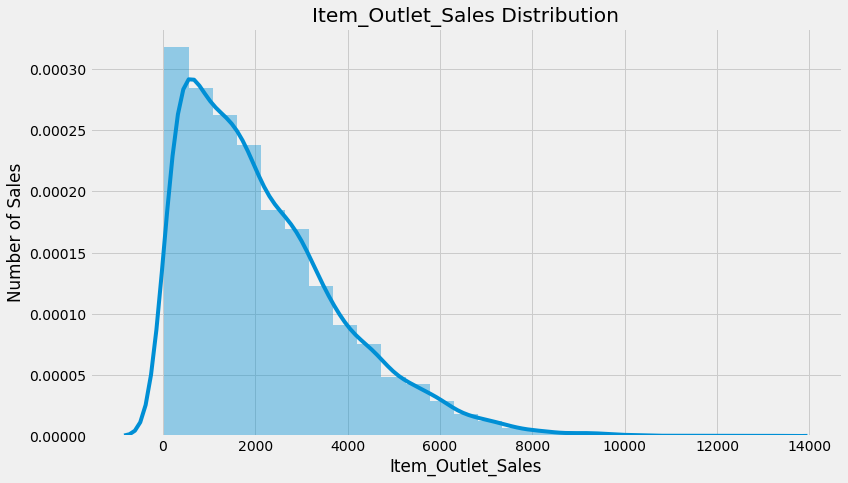

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 7))
sns.distplot(train.Item_Outlet_Sales, bins=25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0, 1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")
plt.show()  

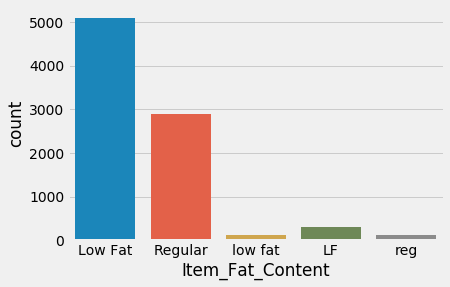

In [14]:
sns.countplot(train.Item_Fat_Content)
plt.show()  # Distribution of fat content

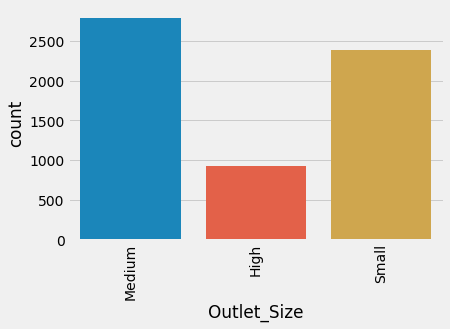

In [23]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)
sns.countplot(train.Outlet_Size)
plt.show()  # Distribution of outlet size

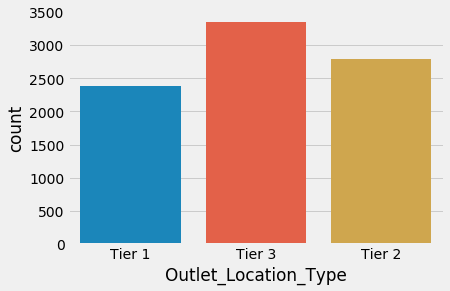

In [20]:
sns.countplot(train.Outlet_Location_Type)
plt.show()  # Distribution of outlet location type

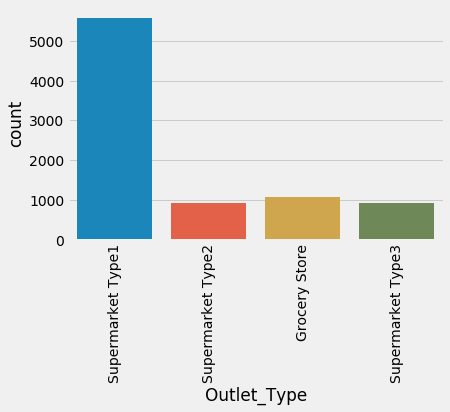

In [25]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)
plt.show()  # Distribution of outlet type

In [26]:
# Join Train and Test Dataset

# Create source column to later separate the data easily
train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test], ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [27]:
# aggfunc is mean by default and ignores NaN by default

item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')  # Create table with identifiers and its weights and ignores the NaN values

In [27]:
item_avg_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
DRB24,8.785
DRB25,12.300
DRB48,16.750
DRC01,5.920


In [28]:
def impute_weight(cols):  # Filling null values with mean
    Weight = cols[0]
    Identifier = cols[1]

    if pd.isnull(Weight):
        print('\nNull index matched:'+str(item_avg_weight.index))
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight

In [29]:
#print(data['Item_Weight'].isnull())
print ('Orignal missing: %d' % sum(data['Item_Weight'].isnull()))
print (data['Item_Weight'].mean())

Orignal missing: 2439
12.792854228644991


In [30]:
data['Item_Weight'] = data[['Item_Weight', 'Item_Identifier']].apply(impute_weight, axis=1).astype(float)

print ('Final missing: %d' % sum(data['Item_Weight'].isnull()))


Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
    


Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
    

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',


Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
    

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',


Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
    


Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
    


Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
    

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',


Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
    

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',


Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
    

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',


Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
    


Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
    


Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
    


Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
    

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',


Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
    

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',


Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
    

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',

      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

Null index matched:Index(['DRA12', 'DRA24',

Final missing: 0


In [34]:
from scipy.stats import mode

# Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=lambda x: x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [35]:
def impute_size_mode(cols):  # Same as above but using mode
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        print("\nreturned value:"+str(outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]))
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

In [36]:
print ('Orignal missing: %d' % sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size', 'Outlet_Type']].apply(impute_size_mode, axis=1)
print ('Final missing: %d' % sum(data['Outlet_Size'].isnull()))

visibility_item_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

Orignal missing: 4016

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned 


returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned 

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned v

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned v

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned v

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned v

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned v

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned v

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned v

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned value:Small

returned v

In [37]:
visibility_item_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [38]:
visibility_item_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
DRB24,0.020596
DRB25,0.079407
DRB48,0.023973
DRC01,0.020653


In [40]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        print("\nvalue returned:"+str(visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]))
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility


In [41]:
print ('Original zeros: %d' % sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility', 'Item_Identifier']].apply(impute_visibility_mean, axis=1).astype(float)

print ('Final zeros: %d' % sum(data['Item_Visibility'] == 0))

Original zeros: 879

value returned:Item_Identifier
FDX07    0.017834
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
NCD19    0.00978
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDP36    0.057059
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDY07    0.040627
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDP33    0.093093
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDO23    0.142462
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
NCP05    0.018757
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDM20    0.036492
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDH35    0.058101
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDV25    0.044416
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDG12    0.004924
Name: Item_Visibility, dtype: float64

value return


value returned:Item_Identifier
FDR49    0.13431
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDY45    0.022315
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
DRE49    0.018148
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
DRE15    0.016765
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
NCN29    0.010005
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDT07    0.075229
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
DRL35    0.023892
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDD02    0.042382
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDP60    0.041997
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDW34    0.037117
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
NCP55    0.009801
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
F


value returned:Item_Identifier
DRF01    0.182646
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDD44    0.068682
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDY21    0.151955
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDH60    0.069566
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDU23    0.020954
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDY55    0.054325
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDK40    0.017014
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDK34    0.037145
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDG44    0.088147
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
DRI01    0.029381
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDU15    0.025071
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier



value returned:Item_Identifier
FDZ03    0.075609
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDD02    0.042382
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDH60    0.069566
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDM58    0.05917
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDX32    0.097445
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDF59    0.074282
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDT45    0.055289
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
DRL47    0.03769
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDE17    0.053139
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDP60    0.041997
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
DRK11    0.010437
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FD


value returned:Item_Identifier
DRH39    0.080467
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
NCS06    0.026782
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDQ58    0.011914
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDT48    0.034538
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDN08    0.085195
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDV31    0.102919
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDQ58    0.011914
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
DRJ49    0.012259
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDR20    0.025022
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
NCI54    0.035032
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
NCQ42    0.040943
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier


Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
NCA17    0.038764
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDX43    0.074016
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
NCV53    0.018157
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDK46    0.049672
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDO12    0.041268
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDP32    0.084573
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDV40    0.012538
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
NCQ41    0.016609
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDX27    0.110078
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDM04    0.041924
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
NCM54    0.05314
Name: Item_Visibility, dtype: flo

Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDV46    0.012266
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDT12    0.04804
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDQ51    0.014965
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
DRM11    0.068914
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDK24    0.087256
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDX24    0.013128
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDE23    0.045393
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDG28    0.043845
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDO39    0.133592
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDQ04    0.088399
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDV23    0.103279
Name: Item_Visibility, dtype: flo


value returned:Item_Identifier
NCN29    0.010005
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDX13    0.049821
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
NCL07    0.030492
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDO10    0.00851
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDV16    0.080685
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDW38    0.106538
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDA21    0.031474
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDD45    0.109564
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDC51    0.009286
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDJ46    0.039251
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
FDT35    0.071308
Name: Item_Visibility, dtype: float64

value returned:Item_Identifier
F

In [42]:
# Remember the data is from 2013
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [43]:
# Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [44]:
data['Item_Type_Combined']

0        FD
1        DR
2        FD
3        FD
4        NC
5        FD
6        FD
7        FD
8        FD
9        FD
10       FD
11       FD
12       FD
13       FD
14       FD
15       FD
16       NC
17       FD
18       DR
19       FD
20       FD
21       FD
22       NC
23       FD
24       FD
25       NC
26       FD
27       DR
28       FD
29       FD
         ..
14174    FD
14175    FD
14176    FD
14177    FD
14178    FD
14179    FD
14180    FD
14181    FD
14182    DR
14183    FD
14184    DR
14185    FD
14186    DR
14187    DR
14188    DR
14189    FD
14190    FD
14191    FD
14192    FD
14193    FD
14194    FD
14195    NC
14196    FD
14197    DR
14198    FD
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: Item_Type_Combined, Length: 14204, dtype: object

In [45]:
# Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})

data['Item_Type_Combined'].value_counts()

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular',
                                                             'low fat': 'Low Fat'})

In [46]:
data['Item_Type_Combined']

0                  Food
1                Drinks
2                  Food
3                  Food
4        Non-Consumable
5                  Food
6                  Food
7                  Food
8                  Food
9                  Food
10                 Food
11                 Food
12                 Food
13                 Food
14                 Food
15                 Food
16       Non-Consumable
17                 Food
18               Drinks
19                 Food
20                 Food
21                 Food
22       Non-Consumable
23                 Food
24                 Food
25       Non-Consumable
26                 Food
27               Drinks
28                 Food
29                 Food
              ...      
14174              Food
14175              Food
14176              Food
14177              Food
14178              Food
14179              Food
14180              Food
14181              Food
14182            Drinks
14183              Food
14184           

In [47]:
print(data['Item_Fat_Content'].value_counts())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [48]:
# Mark non-consumables as separate category in low_fat:

data.loc[data['Item_Type_Combined'] == "Non-Consumable", 'Item_Fat_Content'] = "Non-Edible"

In [49]:
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [50]:
def func(x): return x['Item_Visibility'] / visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]

In [51]:
data['Item_Visibility_MeanRatio'] = data.apply(func, axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [53]:
# New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

In [54]:
data['Outlet']

0        9
1        3
2        9
3        0
4        1
5        3
6        1
7        5
8        7
9        2
10       9
11       8
12       9
13       8
14       1
15       8
16       3
17       9
18       5
19       6
20       1
21       5
22       6
23       4
24       8
25       2
26       6
27       1
28       0
29       4
        ..
14174    1
14175    7
14176    6
14177    1
14178    5
14179    5
14180    8
14181    1
14182    9
14183    1
14184    5
14185    2
14186    3
14187    3
14188    5
14189    8
14190    8
14191    0
14192    5
14193    2
14194    9
14195    9
14196    3
14197    8
14198    9
14199    8
14200    3
14201    7
14202    2
14203    7
Name: Outlet, Length: 14204, dtype: int32

In [55]:
data.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'source',
       'Outlet_Years', 'Item_Type_Combined', 'Item_Visibility_MeanRatio',
       'Outlet'],
      dtype='object')

In [56]:
var_mod = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Item_Type_Combined', 'Outlet_Type', 'Outlet']

for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [57]:
data[var_mod]

,Item_Fat_Content,Outlet_Location_Type,Outlet_Size,Item_Type_Combined,Outlet_Type,Outlet
0,0,0,1,1,1,9
1,2,2,1,0,2,3
2,0,0,1,1,1,9
3,2,2,2,1,0,0
4,1,2,0,2,1,1
5,2,2,1,1,2,3
6,2,2,0,1,1,1
7,0,2,1,1,3,5
8,2,1,2,1,1,7
9,2,1,2,1,1,2


In [58]:
# Exporting the data back

# Drop the columns which have been converted to different types:
data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [59]:
data

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Item_Type_Combined,Item_Visibility_MeanRatio,Outlet
0,0,FDA15,249.8092,3735.1380,0.016047,9.300,OUT049,0,1,1,train,14,1,0.931078,9
1,2,DRC01,48.2692,443.4228,0.019278,5.920,OUT018,2,1,2,train,4,0,0.933420,3
2,0,FDN15,141.6180,2097.2700,0.016760,17.500,OUT049,0,1,1,train,14,1,0.960069,9
3,2,FDX07,182.0950,732.3800,0.017834,19.200,OUT010,2,2,0,train,15,1,1.000000,0
4,1,NCD19,53.8614,994.7052,0.009780,8.930,OUT013,2,0,1,train,26,2,1.000000,1
5,2,FDP36,51.4008,556.6088,0.057059,10.395,OUT018,2,1,2,train,4,1,1.000000,3
6,2,FDO10,57.6588,343.5528,0.012741,13.650,OUT013,2,0,1,train,26,1,1.497197,1
7,0,FDP10,107.7622,4022.7636,0.127470,19.000,OUT027,2,1,3,train,28,1,0.870493,5
8,2,FDH17,96.9726,1076.5986,0.016687,16.200,OUT045,1,2,1,train,11,1,0.924160,7
9,2,FDU28,187.8214,4710.5350,0.094450,19.200,OUT017,1,2,1,train,6,1,0.963983,2


In [60]:
# Divide into test and train:
train = data.loc[data['source'] == "train"]
test = data.loc[data['source'] == "test"]

In [61]:
# Drop unnecessary columns:
test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)
train.drop(['source'], axis=1, inplace=True)

In [62]:
# Export files as modified versions:
train.to_csv("data/train_modified.csv", index=False)
test.to_csv("data/test_modified.csv", index=False)

In [63]:
train_df = pd.read_csv('data/train_modified.csv')
test_df = pd.read_csv('data/test_modified.csv')

In [64]:
train_df

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Years,Item_Type_Combined,Item_Visibility_MeanRatio,Outlet
0,0,FDA15,249.8092,3735.1380,0.016047,9.300,OUT049,0,1,1,14,1,0.931078,9
1,2,DRC01,48.2692,443.4228,0.019278,5.920,OUT018,2,1,2,4,0,0.933420,3
2,0,FDN15,141.6180,2097.2700,0.016760,17.500,OUT049,0,1,1,14,1,0.960069,9
3,2,FDX07,182.0950,732.3800,0.017834,19.200,OUT010,2,2,0,15,1,1.000000,0
4,1,NCD19,53.8614,994.7052,0.009780,8.930,OUT013,2,0,1,26,2,1.000000,1
5,2,FDP36,51.4008,556.6088,0.057059,10.395,OUT018,2,1,2,4,1,1.000000,3
6,2,FDO10,57.6588,343.5528,0.012741,13.650,OUT013,2,0,1,26,1,1.497197,1
7,0,FDP10,107.7622,4022.7636,0.127470,19.000,OUT027,2,1,3,28,1,0.870493,5
8,2,FDH17,96.9726,1076.5986,0.016687,16.200,OUT045,1,2,1,11,1,0.924160,7
9,2,FDU28,187.8214,4710.5350,0.094450,19.200,OUT017,1,2,1,6,1,0.963983,2


In [65]:
test_df

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Years,Item_Type_Combined,Item_Visibility_MeanRatio,Outlet
0,0,FDW58,107.8622,0.007565,20.750,OUT049,0,1,1,14,1,1.029192,9
1,2,FDW14,87.3198,0.038428,8.300,OUT017,1,2,1,6,1,1.130311,2
2,1,NCN55,241.7538,0.099575,14.600,OUT010,2,2,0,15,2,1.735215,0
3,0,FDQ58,155.0340,0.015388,7.315,OUT017,1,2,1,6,1,1.291577,2
4,2,FDY38,234.2300,0.118599,13.600,OUT027,2,1,3,28,1,0.917824,5
5,2,FDH56,117.1492,0.063817,9.800,OUT046,0,2,1,16,1,0.874729,8
6,2,FDL48,50.1034,0.082602,19.350,OUT018,2,1,2,4,1,0.933420,3
7,0,FDC48,81.0592,0.015782,9.195,OUT027,2,1,3,28,1,0.917824,5
8,2,FDN33,95.7436,0.123365,6.305,OUT045,1,2,1,11,1,1.001096,7
9,0,FDA36,186.8924,0.005698,5.985,OUT017,1,2,1,6,1,0.927507,2


In [66]:
# Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier', 'Outlet_Identifier']

In [68]:
from sklearn import model_selection
from sklearn import metrics

In [69]:
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])

    # Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    # Remember the target had been normalized
    Sq_train = (dtrain[target])**2

# Perform cross-validation:
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors], Sq_train, cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))

    # Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Sq_train.values, dtrain_predictions)))

    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))

    # Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])

    # Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


In [70]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

predictors = train_df.columns.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')


Model Report
RMSE : 1.4e+07
CV Score : Mean - 9.271e+06 | Std - 1.035e+06 | Min - 7.867e+06 | Max - 1.19e+07


In [71]:
# Decision Tree model
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, "DT.csv")


Model Report
RMSE : 1.4e+07
CV Score : Mean - 8.601e+06 | Std - 8.683e+05 | Min - 7.244e+06 | Max - 1.062e+07


In [72]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, "RF.csv")


Model Report
RMSE : 1.4e+07
CV Score : Mean - 8.619e+06 | Std - 9.027e+05 | Min - 7.433e+06 | Max - 1.082e+07
